Remaining charge at the goal: 5


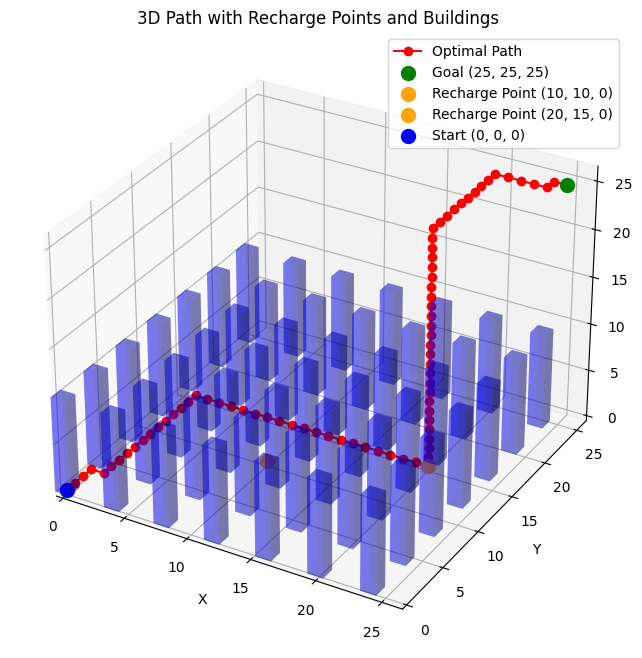

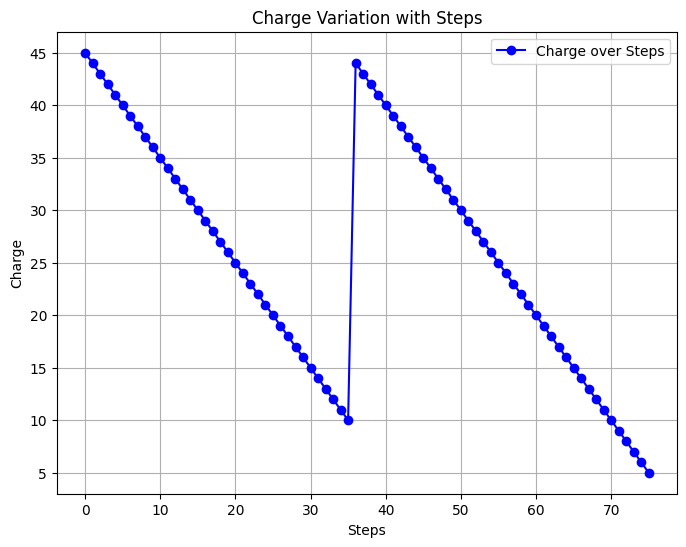

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Define the action space: Right, left, forward, backward, up, down
actions = [
    np.array([1, 0, 0]),  # Move right
    np.array([-1, 0, 0]), # Move left
    np.array([0, 1, 0]),  # Move forward
    np.array([0, -1, 0]), # Move backward
    np.array([0, 0, 1]),  # Move up
    np.array([0, 0, -1])  # Move down
]

# Recharge points
orange_points = [np.array([10, 10, 0]), np.array([20, 15, 0])]

# Grid bounds and charge
grid_size = (25, 25, 25)
max_charge = 45

# Start and goal positions
start = np.array([0,0,0])
goal = np.array([25, 25, 25])

# Buildings (obstacles)
building_radius = 0.6
building_height = 10
buildings = []

for x in range(0, 25, 4):
    for y in range(0, 25, 4):
        z = 0
        buildings.append([x, y, z, building_radius, building_height])

buildings = np.array(buildings)

# Function to check if a point intersects with a building
def is_intersecting_with_buildings(point):
    x, y, z = point
    for building in buildings:
        x_c, y_c, z_c, r, h = building
        if np.sqrt((x - x_c) ** 2 + (y - y_c) ** 2) < r and 0 <= z <= h:
            return True
    return False

# Heuristic function (Euclidean distance to goal)
def heuristic(state, goal):
    return np.linalg.norm(state - goal)

# Check if at an orange recharge point
def is_at_orange_point(state):
    for point in orange_points:
        if np.array_equal(state, point):
            return True
    return False

# A* search algorithm with charge tracking and obstacle avoidance
def a_star_search(start, goal, max_charge):
    # Priority queue: (f_cost, current_charge, path_cost, current_state, path_taken, charge_history)
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), max_charge, 0, tuple(start), [tuple(start)], [max_charge]))

    # Visited dictionary to store the best charge state at each position
    visited = {}

    while pq:
        # Pop the node with the lowest f_cost (f_cost = path_cost + heuristic)
        f_cost, charge, path_cost, current_state, path, charge_history = heapq.heappop(pq)

        # If we reach the goal, return the path and charge history
        if current_state == tuple(goal):
            return path, charge_history

        # Check if current position has been visited with a better charge
        state_key = current_state
        if state_key in visited and visited[state_key] >= charge:
            continue
        visited[state_key] = charge

        # Check if we need to recharge at an orange point
        if is_at_orange_point(np.array(current_state)):
            charge = max_charge  # Recharge fully

        # Explore neighboring states (valid actions)
        for action in actions:
            next_state = np.array(current_state) + action
            next_state = np.clip(next_state, 0, grid_size[0])  # Ensure within bounds

            # Check for collision with buildings
            if is_intersecting_with_buildings(next_state):
                continue  # Ignore this path if it intersects with a building

            # Decrease charge for each step
            next_charge = charge - 1

            # Ignore if charge is less than or equal to 0
            if next_charge <= 0:
                continue

            # Calculate the new path cost
            new_path_cost = path_cost + 1

            # Calculate f_cost (path cost + heuristic)
            f_cost = new_path_cost + heuristic(next_state, goal)

            # Add next state to the priority queue as a tuple, along with the updated charge history
            heapq.heappush(pq, (f_cost, next_charge, new_path_cost, tuple(next_state), path + [tuple(next_state)], charge_history + [next_charge]))

    return None, None  # If no path found

# Find the optimal path and charge history using A* search
path, charge_history = a_star_search(start, goal, max_charge)

# Check if a path was found
if path:
    path = np.array(path)

    # Print the remaining charge when the goal is reached
    print(f"Remaining charge at the goal: {charge_history[-1]}")

    # Plotting the path in 3D
    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(111, projection='3d')
    ax.plot(path[:, 0], path[:, 1], path[:, 2], color='red', marker='o', label='Optimal Path')
    ax.scatter([goal[0]], [goal[1]], [goal[2]], color='green', s=100, label='Goal (25, 25, 25)')
    ax.scatter([10], [10], [0], color='orange', s=100, label='Recharge Point (10, 10, 0)')
    ax.scatter([20], [15], [0], color='orange', s=100, label='Recharge Point (20, 15, 0)')
    ax.scatter([0], [0], [0], color='blue', s=100, label='Start (0, 0, 0)')

    for building in buildings:
        x_center, y_center, z, radius, height = building
        ax.bar3d(x_center - radius, y_center - radius, z, 2 * radius, 2 * radius, height, color='blue', alpha=0.3)

    ax.set_xlim(0, 26)
    ax.set_ylim(0, 26)
    ax.set_zlim(0, 26)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Path with Recharge Points and Buildings')
    plt.legend()
    plt.show()

    # Plot the charge variation over steps
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(charge_history)), charge_history, color='blue', marker='o', label='Charge over Steps')
    plt.xlabel('Steps')
    plt.ylabel('Charge')
    plt.title('Charge Variation with Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No path found!")


Remaining charge at the goal: 10


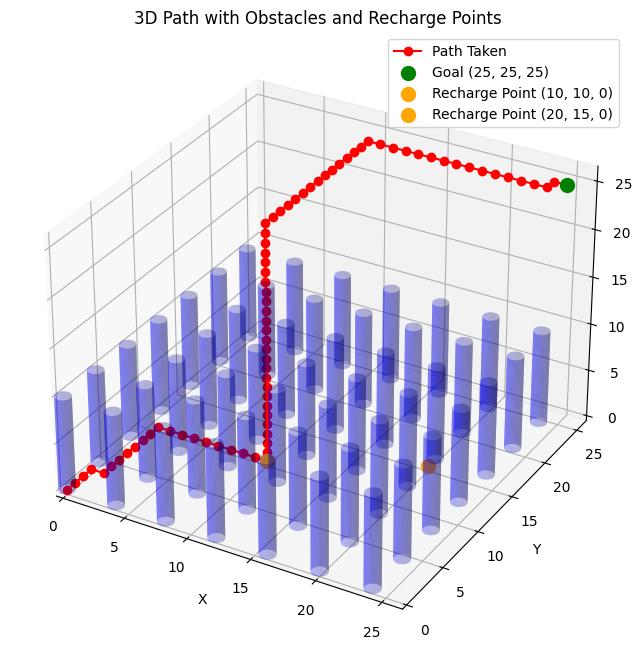

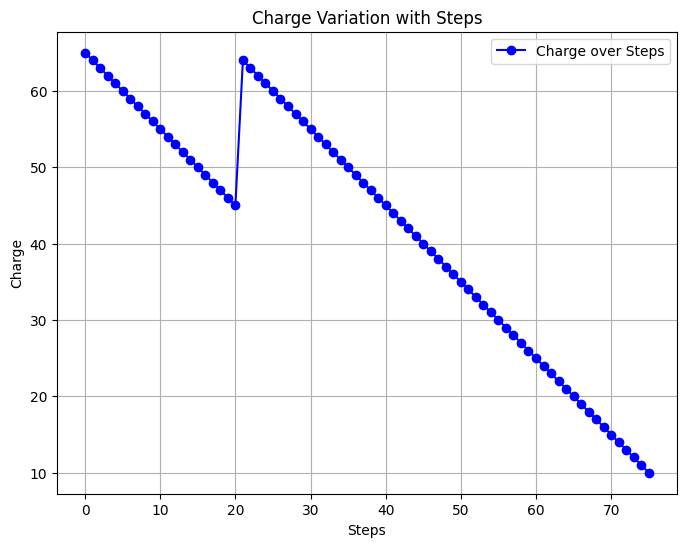

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# ------------------- ENVIRONMENT SETTINGS -------------------
# Buildings
building_radius = 0.6
building_height = 10

buildings = []
for x in range(0, 25, 4):
    for y in range(0, 25, 4):
        z = 0
        buildings.append([x, y, z, building_radius, building_height])
buildings = np.array(buildings)

# Recharge points
orange_points = [np.array([10, 10, 0]), np.array([20, 15, 0])]

# Grid bounds and charge
grid_size = (25, 25, 25)
max_charge = 65

# Start and goal positions
start = np.array([0, 0, 0])
goal = np.array([25, 25, 25])

# ------------------- HELPER FUNCTIONS -------------------
actions = [
    np.array([1, 0, 0]),  # Move right
    np.array([-1, 0, 0]), # Move left
    np.array([0, 1, 0]),  # Move forward
    np.array([0, -1, 0]), # Move backward
    np.array([0, 0, 1]),  # Move up
    np.array([0, 0, -1])  # Move down
]

# Heuristic function (Euclidean distance to goal)
def heuristic(state, goal):
    return np.linalg.norm(state - goal)

# Check if at an orange recharge point (from Code #2)
def is_at_orange_point(state):
    for point in orange_points:
        if np.array_equal(state, point):
            return True
    return False

# Collision with buildings (from Code #1)
def is_intersecting_with_buildings(point):
    x, y, z = point
    for building in buildings:
        x_c, y_c, z_c, r, h = building
        if np.sqrt((x - x_c)**2 + (y - y_c)**2) < r and 0 <= z <= h:
            return True
    return False

# ------------------- PATHFINDING (A*) -------------------
# A* search algorithm with charge tracking and building avoidance
def a_star_search(start, goal, max_charge):
    # Priority queue: (f_cost, current_charge, path_cost, current_state, path_taken, charge_history)
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), max_charge, 0, tuple(start), [tuple(start)], [max_charge]))

    # Visited dictionary to store the best charge state at each position
    visited = {}

    while pq:
        # Pop the node with the lowest f_cost (f_cost = path_cost + heuristic)
        f_cost, charge, path_cost, current_state, path, charge_history = heapq.heappop(pq)

        # If we reach the goal, return the path and charge history
        if current_state == tuple(goal):
            return path, charge_history

        # Check if current position has been visited with a better charge
        state_key = current_state
        if state_key in visited and visited[state_key] >= charge:
            continue
        visited[state_key] = charge

        # Check if we need to recharge at an orange point
        if is_at_orange_point(np.array(current_state)):
            charge = max_charge  # Recharge fully

        # Explore neighboring states (valid actions)
        for action in actions:
            next_state = np.array(current_state) + action
            next_state = np.clip(next_state, 0, grid_size[0])  # Ensure within bounds

            # Skip the next state if it's colliding with buildings
            if is_intersecting_with_buildings(next_state):
                continue

            # Decrease charge for each step
            next_charge = charge - 1

            # Ignore if charge is less than or equal to 0
            if next_charge <= 0:
                continue

            # Calculate the new path cost
            new_path_cost = path_cost + 1

            # Calculate f_cost (path cost + heuristic)
            f_cost = new_path_cost + heuristic(next_state, goal)

            # Add next state to the priority queue as a tuple, along with the updated charge history
            heapq.heappush(pq, (f_cost, next_charge, new_path_cost, tuple(next_state), path + [tuple(next_state)], charge_history + [next_charge]))

    return None, None  # If no path found

# ------------------- VISUALIZATION -------------------
# Plotting the environment and path
def plot_environment_and_path(path):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the obstacles (buildings)
    def plot_cylinder(ax, x_center, y_center, radius, height):
        z = np.linspace(0, height, 50)  # 50 points along the height of the cylinder
        theta = np.linspace(0, 2 * np.pi, 50)  # 50 points for the circular base
        theta_grid, z_grid = np.meshgrid(theta, z)  # Create a grid for theta and z
        x_grid = radius * np.cos(theta_grid) + x_center  # X coordinates for the cylinder surface
        y_grid = radius * np.sin(theta_grid) + y_center  # Y coordinates for the cylinder surface
        ax.plot_surface(x_grid, y_grid, z_grid, color='blue', alpha=0.3)

    # Plot the buildings
    for building in buildings:
        x_center, y_center, z, radius, height = building
        plot_cylinder(ax, x_center, y_center, radius, height)

    # Plot the path
    ax.plot(path[:, 0], path[:, 1], path[:, 2], color='red', marker='o', label='Path Taken')
    ax.scatter([goal[0]], [goal[1]], [goal[2]], color='green', s=100, label='Goal (25, 25, 25)')
    ax.scatter([10], [10], [0], color='orange', s=100, label='Recharge Point (10, 10, 0)')
    ax.scatter([20], [15], [0], color='orange', s=100, label='Recharge Point (20, 15, 0)')

    ax.set_xlim(0, 26)
    ax.set_ylim(0, 26)
    ax.set_zlim(0, 26)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Path with Obstacles and Recharge Points')
    plt.legend()
    plt.show()

# ------------------- MAIN EXECUTION -------------------
# Find the optimal path and charge history using A* search
path, charge_history = a_star_search(start, goal, max_charge)

# Check if a path was found
if path:
    path = np.array(path)

    # Print the remaining charge when the goal is reached
    print(f"Remaining charge at the goal: {charge_history[-1]}")

    # Plot the path and environment
    plot_environment_and_path(path)

    # Plot the charge variation over steps
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(charge_history)), charge_history, color='blue', marker='o', label='Charge over Steps')
    plt.xlabel('Steps')
    plt.ylabel('Charge')
    plt.title('Charge Variation with Steps')
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No path found!")


Target Point 1: [5 5 5]
  Path Length: 16 steps
  Fuel Consumed: 15 units



NameError: name 'goal' is not defined

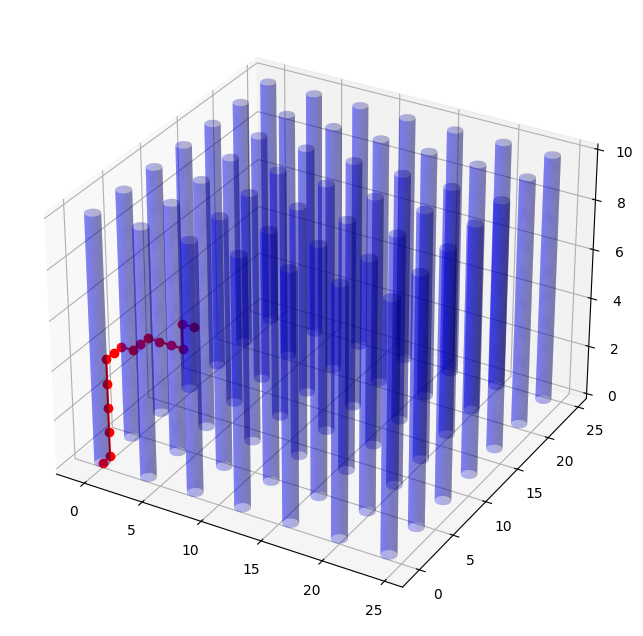

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# ------------------- ENVIRONMENT SETTINGS -------------------
# Building properties
building_radius = 0.6
building_height = 10

# Create buildings
buildings = []
for x in range(0, 25, 4):
    for y in range(0, 25, 4):
        z = 0
        buildings.append([x, y, z, building_radius, building_height])
buildings = np.array(buildings)

# Recharge points
orange_points = [np.array([10, 10, 0]), np.array([20, 15, 0])]

# Grid size and maximum charge
grid_size = (25, 25, 25)
max_charge = 25

# Start position
start = np.array([0, 0, 0])

# Target points
target_points = [
    np.array([5, 5, 5]),
    np.array([10, 15, 7]),
    np.array([15, 10, 3]),
    np.array([20, 20, 8]),
    np.array([3, 18, 12]),
    np.array([12, 5, 18]),
    np.array([8, 8, 2]),
    np.array([22, 3, 10]),
    np.array([18, 17, 6]),
    np.array([7, 15, 14])
]

# Section boundaries
sections = {
    'Section 1': (0, 8, 0, 8),
    'Section 2': (8, 16, 0, 8),
    'Section 3': (16, 24, 0, 8),
    'Section 4': (0, 8, 8, 16),
    'Section 5': (8, 16, 8, 16),
    'Section 6': (16, 24, 8, 16),
    'Section 7': (0, 8, 16, 24),
    'Section 8': (8, 16, 16, 24),
    'Section 9': (16, 24, 16, 24),
}

# Check if a point is within a given section
def is_point_in_section(point, section):
    x, y = point[:2]
    x_min, x_max, y_min, y_max = section
    return x_min <= x < x_max and y_min <= y < y_max

# Determine which section a point is in
def find_section(point):
    for section_name, bounds in sections.items():
        if is_point_in_section(point, bounds):
            return section_name
    return None

# ------------------- HELPER FUNCTIONS -------------------
actions = [
    np.array([1, 0, 0]),  # Move right
    np.array([-1, 0, 0]), # Move left
    np.array([0, 1, 0]),  # Move forward
    np.array([0, -1, 0]), # Move backward
    np.array([0, 0, 1]),  # Move up
    np.array([0, 0, -1])  # Move down
]

# Heuristic function (Euclidean distance to goal)
def heuristic(state, goal):
    return np.linalg.norm(state - goal)

# Check if the drone is at a recharge point
def is_at_orange_point(state):
    for point in orange_points:
        if np.array_equal(state, point):
            return True
    return False

# Collision detection with buildings
def is_intersecting_with_buildings(point):
    x, y, z = point
    for building in buildings:
        x_c, y_c, z_c, r, h = building
        if np.sqrt((x - x_c)**2 + (y - y_c)**2) < r and 0 <= z <= h:
            return True
    return False

# ------------------- PATHFINDING (A*) -------------------
# A* search algorithm with section logic and charge tracking
def a_star_search(start, goal, max_charge):
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), max_charge, 0, tuple(start), [tuple(start)], [max_charge]))

    visited = {}
    current_section = find_section(start)

    while pq:
        f_cost, charge, path_cost, current_state, path, charge_history = heapq.heappop(pq)

        if current_state == tuple(goal):
            return path, charge_history

        state_key = current_state
        if state_key in visited and visited[state_key] >= charge:
            continue
        visited[state_key] = charge

        if is_at_orange_point(np.array(current_state)):
            charge = max_charge

        for action in actions:
            next_state = np.array(current_state) + action
            next_state = np.clip(next_state, 0, grid_size[0] - 1)

            if is_intersecting_with_buildings(next_state):
                continue

            next_charge = charge - 1

            if next_charge <= 0:
                continue

            new_path_cost = path_cost + 1

            if current_section != find_section(goal):
                next_section = find_section(next_state)
                if next_section != current_section:
                    current_section = next_section

            f_cost = new_path_cost + heuristic(next_state, goal)

            heapq.heappush(pq, (f_cost, next_charge, new_path_cost, tuple(next_state), path + [tuple(next_state)], charge_history + [next_charge]))

    return None, None

# ------------------- VISUALIZATION -------------------
def plot_environment_and_path(path):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the obstacles (buildings)
    def plot_cylinder(ax, x_center, y_center, radius, height):
        z = np.linspace(0, height, 50)
        theta = np.linspace(0, 2 * np.pi, 50)
        theta_grid, z_grid = np.meshgrid(theta, z)
        x_grid = radius * np.cos(theta_grid) + x_center
        y_grid = radius * np.sin(theta_grid) + y_center
        ax.plot_surface(x_grid, y_grid, z_grid, color='blue', alpha=0.3)

    # Plot the buildings
    for building in buildings:
        x_center, y_center, z, radius, height = building
        plot_cylinder(ax, x_center, y_center, radius, height)

    # Plot the path
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], path[:, 2], color='red', marker='o', label='Path Taken')
    
    # Mark goal and start points
    ax.scatter([goal[0]], [goal[1]], [goal[2]], color='green', label='Goal', s=100)
    ax.scatter([start[0]], [start[1]], [start[2]], color='purple', label='Start', s=100)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Drone Path with Section Constraints')

    plt.legend()
    plt.show()

# ------------------- MAIN EXECUTION -------------------
results = []

for target in target_points:
    path, charge_history = a_star_search(start, target, max_charge)
    fuel_consumed = max_charge - charge_history[-1] if charge_history else "N/A"
    results.append((target, path, fuel_consumed))

# Print results for each target point
for i, (target, path, fuel) in enumerate(results, start=1):
    print(f"Target Point {i}: {target}")
    if path:
        print(f"  Path Length: {len(path)} steps")
    else:
        print("  No Path Found")
    print(f"  Fuel Consumed: {fuel} units\n")

    # Plotting the path for the target
    if path:
        plot_environment_and_path(path)


In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Target points
target_points = [
    np.array([5, 5, 5]),
    np.array([10, 15, 7]),
    np.array([15, 10, 3]),
    np.array([20, 20, 8]),
    np.array([3, 18, 12]),
    np.array([12, 5, 18]),
    np.array([8, 8, 2]),
    np.array([22, 3, 10]),
    np.array([18, 17, 6]),
    np.array([7, 15, 14])
]

# Define the action space: Right, left, forward, backward, up, down
actions = [
    np.array([1, 0, 0]),  # Move right
    np.array([-1, 0, 0]), # Move left
    np.array([0, 1, 0]),  # Move forward
    np.array([0, -1, 0]), # Move backward
    np.array([0, 0, 1]),  # Move up
    np.array([0, 0, -1])  # Move down
]

# Recharge points
orange_points = [np.array([10, 10, 0]), np.array([20, 15, 0])]

# Grid bounds and charge
grid_size = (25, 25, 25)
max_charge = 45

# Start and goal positions
start = np.array([0, 0, 0])

# Buildings (obstacles)
building_radius = 0.6
building_height = 10
buildings = []

for x in range(0, 25, 4):
    for y in range(0, 25, 4):
        z = 0
        buildings.append([x, y, z, building_radius, building_height])

buildings = np.array(buildings)

# Function to check if a point intersects with a building
def is_intersecting_with_buildings(point):
    x, y, z = point
    for building in buildings:
        x_c, y_c, z_c, r, h = building
        if np.sqrt((x - x_c) ** 2 + (y - y_c) ** 2) < r and 0 <= z <= h:
            return True
    return False

# Heuristic function (Euclidean distance to goal)
def heuristic(state, goal):
    return np.linalg.norm(state - goal)

# Check if at an orange recharge point
def is_at_orange_point(state):
    for point in orange_points:
        if np.array_equal(state, point):
            return True
    return False

# A* search algorithm with charge tracking and obstacle avoidance
def a_star_search(start, goal, max_charge):
    # Priority queue: (f_cost, current_charge, path_cost, current_state, path_taken, charge_history)
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), max_charge, 0, tuple(start), [tuple(start)], [max_charge]))

    # Visited dictionary to store the best charge state at each position
    visited = {}

    while pq:
        # Pop the node with the lowest f_cost (f_cost = path_cost + heuristic)
        f_cost, charge, path_cost, current_state, path, charge_history = heapq.heappop(pq)

        # If we reach the goal, return the path and charge history
        if current_state == tuple(goal):
            return path, charge_history

        # Check if current position has been visited with a better charge
        state_key = current_state
        if state_key in visited and visited[state_key] >= charge:
            continue
        visited[state_key] = charge

        # Check if we need to recharge at an orange point
        if is_at_orange_point(np.array(current_state)):
            charge = max_charge  # Recharge fully

        # Explore neighboring states (valid actions)
        for action in actions:
            next_state = np.array(current_state) + action
            next_state = np.clip(next_state, 0, grid_size[0])  # Ensure within bounds

            # Check for collision with buildings
            if is_intersecting_with_buildings(next_state):
                continue  # Ignore this path if it intersects with a building

            # Decrease charge for each step
            next_charge = charge - 1

            # Ignore if charge is less than or equal to 0
            if next_charge <= 0:
                continue

            # Calculate the new path cost
            new_path_cost = path_cost + 1

            # Calculate f_cost (path cost + heuristic)
            f_cost = new_path_cost + heuristic(next_state, goal)

            # Add next state to the priority queue as a tuple, along with the updated charge history
            heapq.heappush(pq, (f_cost, next_charge, new_path_cost, tuple(next_state), path + [tuple(next_state)], charge_history + [next_charge]))

    return None, None  # If no path found

# Loop over target points and calculate path and fuel consumed
results = []

for target in target_points:
    path, charge_history = a_star_search(start, target, max_charge)

    if path:
        path = np.array(path)
        
        # Calculate path covered
        path_covered = np.sum(np.linalg.norm(np.diff(path, axis=0), axis=1))
        
        # Calculate fuel consumed
        fuel_consumed = max_charge - charge_history[-1]
        
        # Log results
        results.append({
            'target': target,
            'path_length': path_covered,
            'fuel_consumed': fuel_consumed,
            'remaining_charge': charge_history[-1]
        })
    else:
        results.append({
            'target': target,
            'path_length': None,
            'fuel_consumed': None,
            'remaining_charge': None
        })

# Print results for each target
for result in results:
    print(f"Target: {result['target']}, Path Length: {result['path_length']}, "
          f"Fuel Consumed: {result['fuel_consumed']}, Remaining Charge: {result['remaining_charge']}")


Target: [5 5 5], Path Length: 15.0, Fuel Consumed: 15, Remaining Charge: 30
Target: [10 15  7], Path Length: 32.0, Fuel Consumed: 32, Remaining Charge: 13
Target: [15 10  3], Path Length: 28.0, Fuel Consumed: 28, Remaining Charge: 17
Target: [20 20  8], Path Length: None, Fuel Consumed: None, Remaining Charge: None
Target: [ 3 18 12], Path Length: 33.0, Fuel Consumed: 33, Remaining Charge: 12
Target: [12  5 18], Path Length: 35.0, Fuel Consumed: 35, Remaining Charge: 10
Target: [8 8 2], Path Length: None, Fuel Consumed: None, Remaining Charge: None
Target: [22  3 10], Path Length: 35.0, Fuel Consumed: 35, Remaining Charge: 10
Target: [18 17  6], Path Length: 41.0, Fuel Consumed: 41, Remaining Charge: 4
Target: [ 7 15 14], Path Length: 36.0, Fuel Consumed: 36, Remaining Charge: 9


In [1]:
import numpy as np
import heapq

# ------------------- ENVIRONMENT SETTINGS -------------------
# Building properties
building_radius = 0.6
building_height = 10

# Create buildings
buildings = []
for x in range(0, 25, 4):
    for y in range(0, 25, 4):
        z = 0
        buildings.append([x, y, z, building_radius, building_height])
buildings = np.array(buildings)

# Recharge points
orange_points = [np.array([10, 10, 0]), np.array([20, 15, 0])]

# Grid size and maximum charge
grid_size = (25, 25, 25)
max_charge = 25

# Start position
start = np.array([0, 0, 0])

# Constant target points
target_points = [
    np.array([5, 5, 5]),
    np.array([10, 15, 7]),
    np.array([15, 10, 3]),
    np.array([20, 20, 8]),
    np.array([3, 18, 12]),
    np.array([12, 5, 18]),
    np.array([8, 8, 2]),
    np.array([22, 3, 10]),
    np.array([18, 17, 6]),
    np.array([7, 15, 14])
]

# ------------------- HELPER FUNCTIONS -------------------
actions = [
    np.array([1, 0, 0]),  # Move right
    np.array([-1, 0, 0]), # Move left
    np.array([0, 1, 0]),  # Move forward
    np.array([0, -1, 0]), # Move backward
    np.array([0, 0, 1]),  # Move up
    np.array([0, 0, -1])  # Move down
]

# Heuristic function (Euclidean distance to goal)
def heuristic(state, goal):
    return np.linalg.norm(state - goal)

# Check if the drone is at a recharge point
def is_at_orange_point(state):
    for point in orange_points:
        if np.array_equal(state, point):
            return True
    return False

# Collision detection with buildings
def is_intersecting_with_buildings(point):
    x, y, z = point
    for building in buildings:
        x_c, y_c, z_c, r, h = building
        if np.sqrt((x - x_c)**2 + (y - y_c)**2) < r and 0 <= z <= h:
            return True
    return False

# ------------------- PATHFINDING (A*) -------------------
# A* search algorithm with charge tracking
def a_star_search(start, goal, max_charge):
    pq = []
    heapq.heappush(pq, (0 + heuristic(start, goal), max_charge, 0, tuple(start), [tuple(start)], [max_charge]))

    visited = {}

    while pq:
        f_cost, charge, path_cost, current_state, path, charge_history = heapq.heappop(pq)

        if current_state == tuple(goal):
            return path, charge_history

        state_key = current_state
        if state_key in visited and visited[state_key] >= charge:
            continue
        visited[state_key] = charge

        if is_at_orange_point(np.array(current_state)):
            charge = max_charge  # Recharge fully if at an orange point

        for action in actions:
            next_state = np.array(current_state) + action
            next_state = np.clip(next_state, 0, np.array(grid_size) - 1)

            if is_intersecting_with_buildings(next_state):
                continue

            next_charge = charge - 1
            if next_charge <= 0:
                continue

            new_path_cost = path_cost + 1
            f_cost = new_path_cost + heuristic(next_state, goal)

            heapq.heappush(pq, (f_cost, next_charge, new_path_cost, tuple(next_state), path + [tuple(next_state)], charge_history + [next_charge]))

    return None, None

# ------------------- MAIN EXECUTION -------------------
results = []
for target in target_points:
    path, charge_history = a_star_search(start, target, max_charge)
    if path:
        # Calculate path length
        path = np.array(path)
        path_length = np.sum(np.linalg.norm(np.diff(path, axis=0), axis=1))  # Sum of distances between consecutive points

        # Calculate fuel consumed
        fuel_consumed = max_charge - charge_history[-1]  # Initial charge minus remaining charge

        results.append({
            'target_point': target,
            'path_length': path_length,
            'fuel_consumed': fuel_consumed
        })

print(results)


[{'target_point': array([5, 5, 5]), 'path_length': 15.0, 'fuel_consumed': 15}, {'target_point': array([10, 15,  7]), 'path_length': 32.0, 'fuel_consumed': 12}, {'target_point': array([15, 10,  3]), 'path_length': 28.0, 'fuel_consumed': 8}, {'target_point': array([22,  3, 10]), 'path_length': 59.0, 'fuel_consumed': 24}, {'target_point': array([18, 17,  6]), 'path_length': 41.0, 'fuel_consumed': 21}, {'target_point': array([ 7, 15, 14]), 'path_length': 42.0, 'fuel_consumed': 22}]


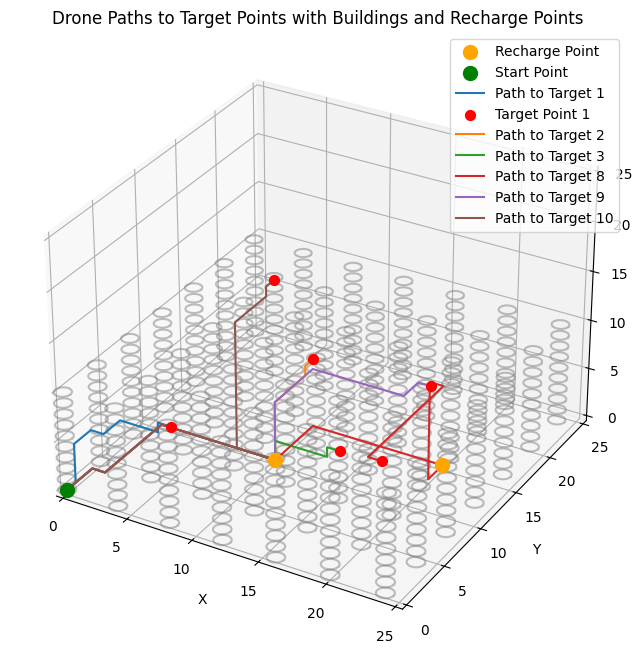

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize paths, buildings, and recharge points
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot buildings
for building in buildings:
    x, y, z, r, h = building
    # Cylinder approximation for building visualization
    theta = np.linspace(0, 2 * np.pi, 20)
    x_circle = r * np.cos(theta) + x
    y_circle = r * np.sin(theta) + y
    for z_pos in np.linspace(z, z + h, 10):
        ax.plot(x_circle, y_circle, zs=z_pos, color='gray', alpha=0.5)

# Plot recharge points
for point in orange_points:
    ax.scatter(*point, color='orange', s=100, label="Recharge Point" if point is orange_points[0] else "")

# Plot start point
ax.scatter(*start, color='green', s=100, label='Start Point')

# Plot each path to the target points
for idx, target in enumerate(target_points):
    path, charge_history = a_star_search(start, target, max_charge)
    if path:
        path = np.array(path)
        ax.plot(path[:, 0], path[:, 1], path[:, 2], label=f'Path to Target {idx+1}')
        ax.scatter(*target, color='red', s=50, label=f'Target Point {idx+1}' if idx == 0 else "")  # Show only once in legend

# Plot configuration
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, grid_size[0])
ax.set_ylim(0, grid_size[1])
ax.set_zlim(0, grid_size[2])
ax.legend()
plt.title("Drone Paths to Target Points with Buildings and Recharge Points")
plt.show()
